Enter the latitude:49.2497
49.2497
Enter the longitude:-123.1193
-123.1193
Enter the altitude:70
70


<AxesSubplot:xlabel='time'>

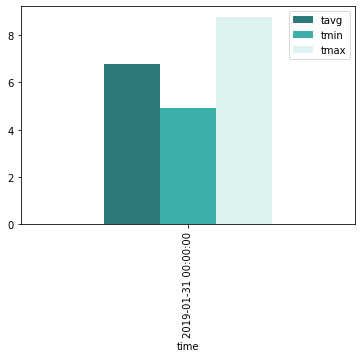

In [9]:
from datetime import datetime 
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd
from itertools import cycle, islice

#Input Parameters to Identify Location
latitude=float(input("Enter the latitude:"))
print(latitude)
longitude=float(input("Enter the longitude:"))
print(longitude)
altitude=int(input("Enter the altitude:"))
print(altitude)

#input date
start=str(input("Enter the start date(yyyy/mm/dd):"))
print(start)
yr=int(start[0:4])
mon=int(start[5:7])
dd=int(start[8:10])
end=str(input("Enter the end date(yyyy/mm/dd):"))
print(end)
eyr=int(end[0:4])
emon=int(end[5:7])
edd=int(end[8:10])
#set date
start_date=datetime(yr,mon,dd)
date=datetime(eyr,emon,edd)
diff=(date-start_date).days

#enter base temp
temp=int(input("Enter base temperature:(C)"))
print(temp)

#Create Point for Location
location=Point(latitude, longitude, altitude)

#Get daily data
data = Daily(location, start_date, date)
data = data.fetch()

#Accessing data
s=data['tavg']
t=data['tmin']
u=data['tmax']

#need the base temp to calculate GDD
GDD=[0]
gdd=0
for i in range(diff):
  avg=s[i]
  if avg<=temp:
    g=0
  else:
    g=avg-temp
  gdd+=g
  GDD.append(gdd)
data["GDD"]=GDD

#Graph
my_colors = list(islice(cycle(['#2b7a78', '#3aafa9', '#def2f1']),3))
data.plot(y=['tavg','tmin','tmax'], kind='line', color=my_colors)
data.plot(y=['GDD'], kind='line', color="red")
